In [1]:
import re
import numpy as np
import pandas as pd
from math import * 
import scipy as sp
from scipy.stats import mode
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline 

In [103]:
#for i in range(len(prices)):
    #prices[i] = prices[i].replace(',', '')
    #prices[i] = prices[i].strip('$')
    #prices[i] = float(prices[i])
   

IndentationError: expected an indented block (<ipython-input-103-0e28329195cb>, line 5)

## Calendar Data 

In [2]:
time_data = pd.read_csv('calendar.csv', delimiter=',')

In [5]:
# Regex the price and generate log(price)
time_data['price'] = time_data['price'].replace('[\$,)]','', regex=True).replace('[(]','-', regex=True).astype(float)
time_data['log_price'] = np.log(time_data['price'].values)

In [28]:
time_data.head()

,listing_id,date,available,price,questionable,log_price
0,3604481,1/1/2015,t,600.0,NaN,6.39693
1,3604481,1/2/2015,t,600.0,NaN,6.39693
2,3604481,1/3/2015,t,600.0,NaN,6.39693
3,3604481,1/4/2015,t,600.0,NaN,6.39693
4,3604481,1/5/2015,t,600.0,NaN,6.39693


In [3]:
time_data.size

5242875

In [6]:
# Only consider data for which there is data
nan_adjusted = time_data[np.isfinite(time_data['log_price'])]

In [87]:
#Still left with a reasonable amount of observations
nan_adjusted.size

4641912

In [31]:
# Group by listing_id, then find each listing id's average price
grouped = nan_adjusted.groupby(['listing_id'], as_index = False)

means = grouped['price'].mean().values
log_means = grouped['log_price'].mean().values

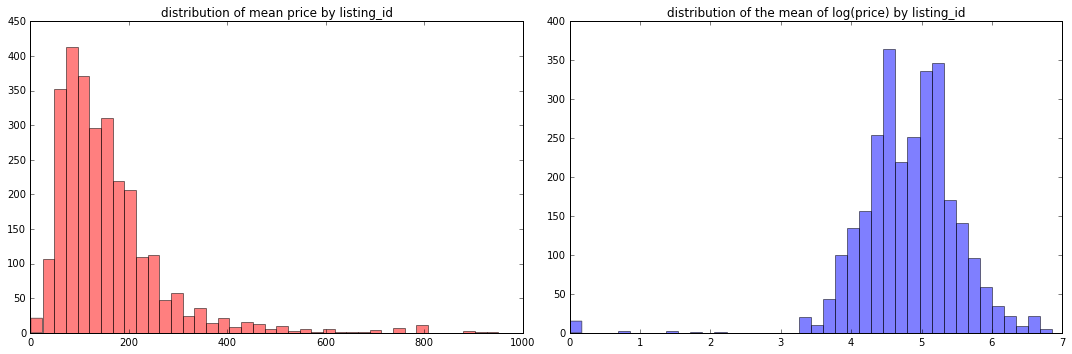

In [42]:
# Examine Distribution of average price by listing_id

fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(15, 5))

ax1.hist(means, color='red', bins=40, alpha=0.5)
ax1.set_title('distribution of mean price by listing_id')

ax2.hist(log_means, color='blue', bins=40, alpha=0.5)
ax2.set_title('distribution of the mean of log(price) by listing_id')

plt.tight_layout()
plt.show()

In [ ]:
#Goals: 
# 1)Get the average price for each specific listing [done]
# 2)Compute the distance between each day's price and the average price [done]
# 3)Visualize spikes [done]
# 4)For each day, check the change in price [done]

In [65]:
# Find high demand dates by checking for positive distance between a listings average price and it's current price.
# For these purposes, high demand is categorized as a date which experienced, on average, properties being 
# priced above their average list price

In [101]:
print "number of unique properties:", len(nan_adjusted['listing_id'].unique())

number of unique properties: 2815


In [8]:
# Let's sort to make things easier on pattern matching algorithm

nan_adjusted.sort(['listing_id'], inplace=True)
time_data.sort(['listing_id'], inplace=True)

C:\Users\Excaliburxiv\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
C:\Users\Excaliburxiv\AppData\Local\Continuum\Anaconda2\lib\site-packages\pandas\core\frame.py:3218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  na_position=na_position)
C:\Users\Excaliburxiv\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [37]:
mean_df = grouped.mean()
mean_df['listing_id']

0          2684
1          3330
2          4611
3          5099
4          5110
5          5172
6          5203
7          5270
8          5441
9          5489
10         5818
11         5862
12         5945
13         6171
14         6628
15         7036
16         7097
17         7249
18         7626
19         8270
20         9357
21         9529
22         9680
23         9704
24         9782
25         9783
26         9896
27        10423
28        10950
29        10962
         ...   
2785    4857477
2786    4857675
2787    4860430
2788    4860442
2789    4860598
2790    4860988
2791    4861791
2792    4861859
2793    4861911
2794    4862061
2795    4862166
2796    4862175
2797    4862501
2798    4862702
2799    4862870
2800    4862933
2801    4863048
2802    4863090
2803    4863255
2804    4868986
2805    4872405
2806    4884213
2807    4884427
2808    4905337
2809    4908335
2810    4909427
2811    4915452
2812    4916824
2813    4922047
2814    4922220
Name: listing_id, dtype:

In [16]:
# Maybe I need to reset the index, who the hell knows if I'll use this later
nan_adjusted.reset_index(inplace=True)

In [18]:
# Initialize an empty column for the price differences 
nan_adjusted['price_diff'] = 0

C:\Users\Excaliburxiv\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [25]:
for i in range(nan_adjusted['listing_id'].count()):
    nan_adjusted.iloc[i]['price_diff'] = nan_adjusted.iloc[i]['price'] - mean_df.iloc[nan_adjusted.iloc[i]['listing_id']]['price']
    
    

C:\Users\Excaliburxiv\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


IndexError: single positional indexer is out-of-bounds

In [45]:
# Subset dataframe of averages for left-merge
mean_df_new = mean_df[['listing_id','price']]

In [46]:
# Left-Merge
new = nan_adjusted.merge(mean_df_new,how='left', left_on='listing_id', right_on='listing_id')

In [48]:
# Compute price differences 
new['price_diff'] = new['price_x'] - new['price_y']

In [51]:
# Convert dates to datetime
dates = pd.to_datetime(new['date'].values)

DatetimeIndex(['2015-01-09', '2015-10-02', '2015-10-03', '2015-10-04',
               '2015-10-05', '2015-10-06', '2015-10-07', '2015-10-08',
               '2015-10-09', '2015-10-10',
               ...
               '2015-09-01', '2015-09-02', '2015-09-03', '2015-09-04',
               '2015-09-05', '2015-09-06', '2015-09-07', '2015-09-08',
               '2015-09-10', '2015-08-05'],
              dtype='datetime64[ns]', length=773652, freq=None)

In [52]:
# Add new datetime object
new['datetime'] = dates

In [65]:
# Groupby datetime, get average price difference
final = new.groupby(['datetime'], as_index = False)
final_sums = final['price_diff'].mean()

In [103]:
print "Number of days average price difference was positive:", sum(final_sums['price_diff']>0)

Number of days average price difference was positive: 154


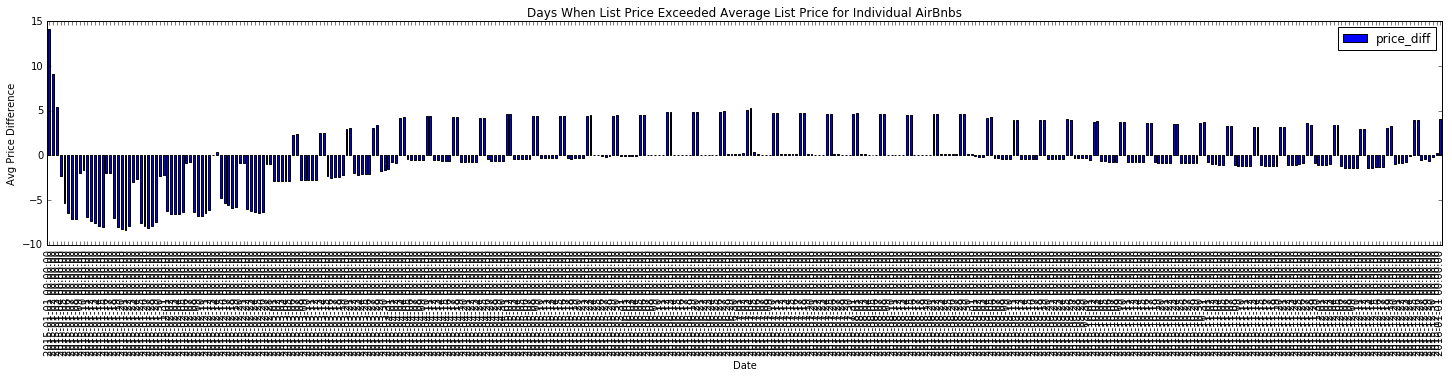

In [68]:
# Examine overall price difference trend

fig, ax = plt.subplots(1, 1, figsize=(25, 4))
final_sums.plot(kind='bar', ax=ax)
ax.set_xticklabels(final_sums['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Days When List Price Exceeded Average List Price for Individual AirBnbs')

In [92]:
# Subset the data for easier viewing 

fall = final_sums[(final_sums['datetime'] > '2015-09-22') & (final_sums['datetime'] < '2015-12-22')] 
winter = final_sums[(final_sums['datetime'] > '2015-12-21') | (final_sums['datetime'] < '2015-03-20')] 
spring = final_sums[(final_sums['datetime'] > '2015-03-19') & (final_sums['datetime'] < '2015-06-21')] 
summer = final_sums[(final_sums['datetime'] > '2015-06-20') & (final_sums['datetime'] < '2015-09-23')] 

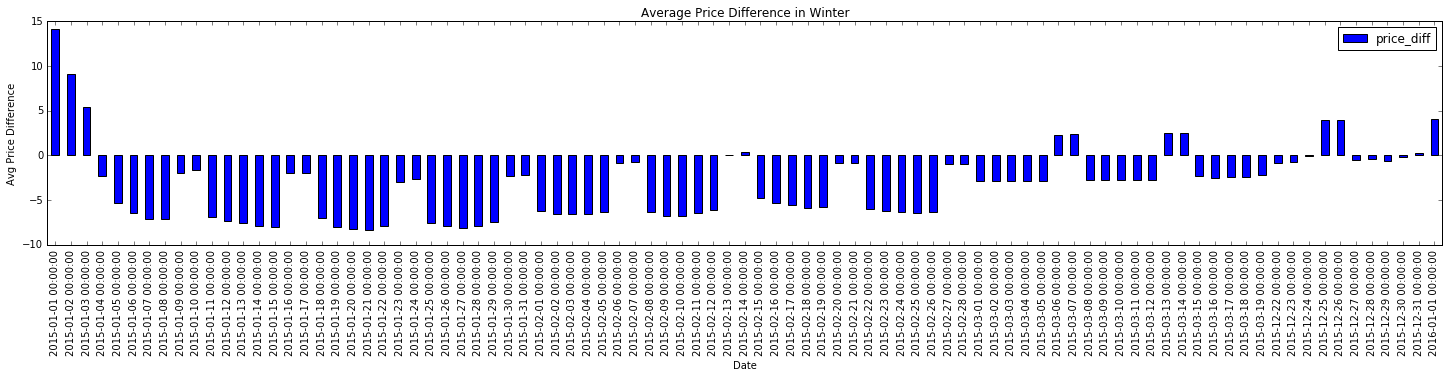

In [107]:
# WINTER 

fig, ax = plt.subplots(1, 1, figsize=(25, 4))
winter.plot(kind='bar', ax=ax)
ax.set_xticklabels(winter['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Winter')

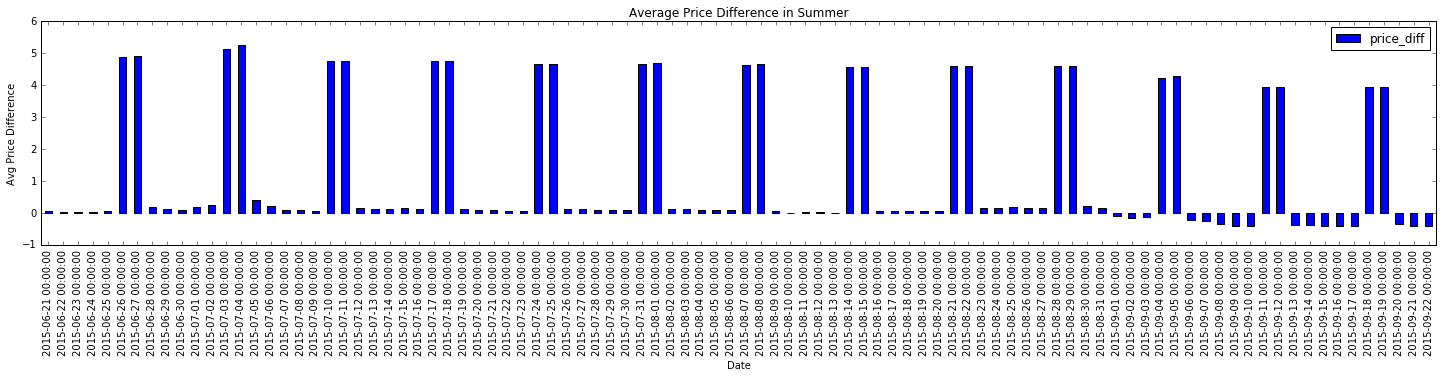

In [106]:
# SUMMER 

fig, ax = plt.subplots(1, 1, figsize=(25, 4))
summer.plot(kind='bar', ax=ax)
ax.set_xticklabels(summer['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Summer')

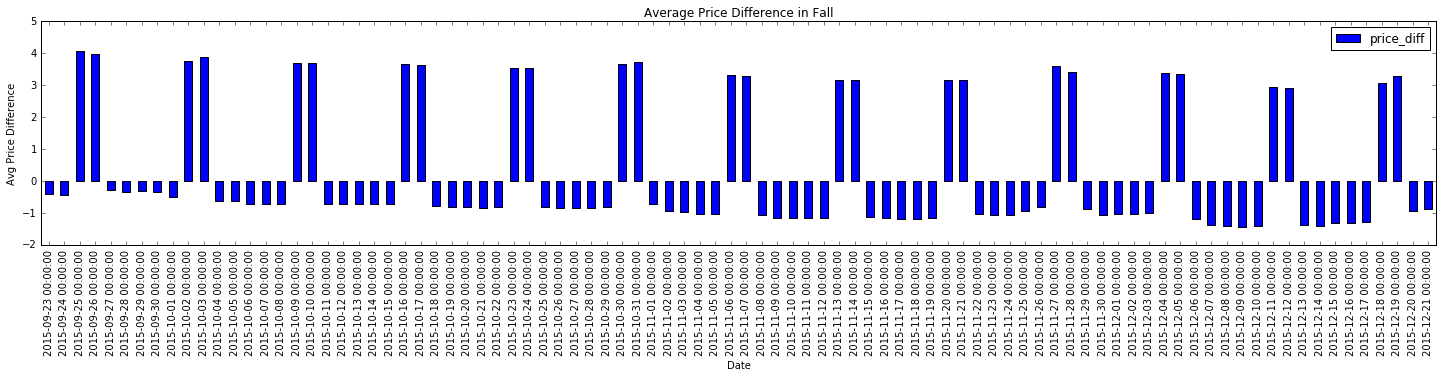

In [105]:
#FALL

fig, ax = plt.subplots(1, 1, figsize=(25, 4))
fall.plot(kind='bar', ax=ax)
ax.set_xticklabels(fall['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Fall')

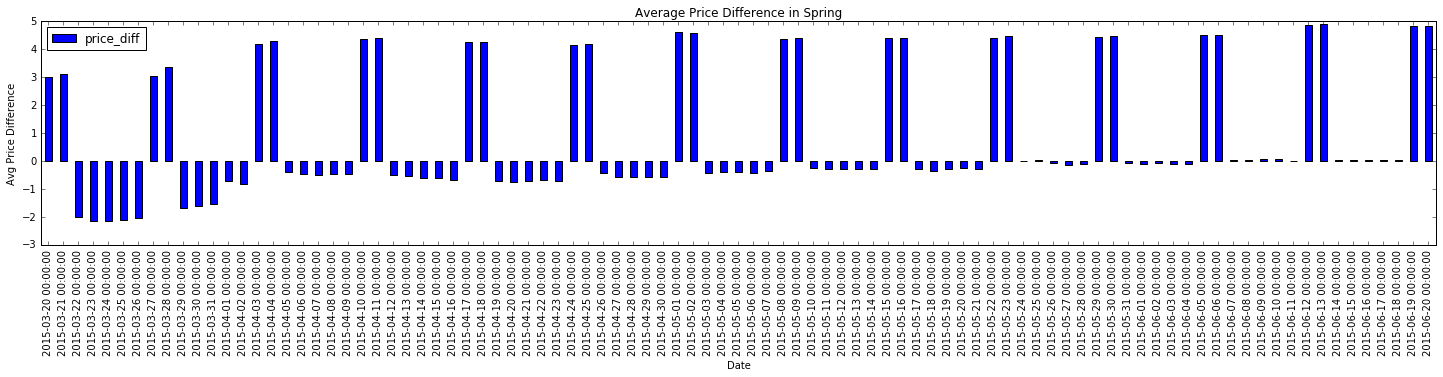

In [104]:
# SPRING

fig, ax = plt.subplots(1, 1, figsize=(25, 4))
spring.plot(kind='bar', ax=ax)
ax.set_xticklabels(spring['datetime'])
ax.set_xlabel('Date')
ax.set_ylabel('Avg Price Difference')
ax.set_title('Average Price Difference in Spring')